# Example code of pDESy v0.4.0

## Example code

In [1]:
import datetime

import pDESy
from pDESy.model.base_project import BaseProject
from pDESy.model.base_product import BaseProduct
from pDESy.model.base_component import BaseComponent
from pDESy.model.base_workflow import BaseWorkflow
from pDESy.model.base_task import BaseTask
from pDESy.model.base_organization import BaseOrganization
from pDESy.model.base_team import BaseTeam
from pDESy.model.base_worker import BaseWorker
from pDESy.model.base_facility import BaseFacility
from pDESy.model.base_workplace import BaseWorkplace

In [2]:
print(pDESy.__version__)

0.4.6


#### Defining project model including product, workflow and organization

In [3]:
# Project definition
project = BaseProject(init_datetime = datetime.datetime(2020, 4, 1,8, 0, 0), unit_timedelta=datetime.timedelta(days=1))

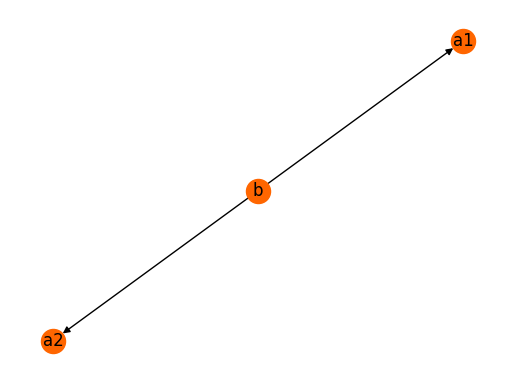

In [4]:
# Components in Product
a1 = BaseComponent('a1')
a2 = BaseComponent('a2')
b = BaseComponent('b')
b.extend_child_component_list([a1, a2])

# Register Product including Components in Project
project.product = BaseProduct([a1, a2, b])
project.product.draw_networkx()

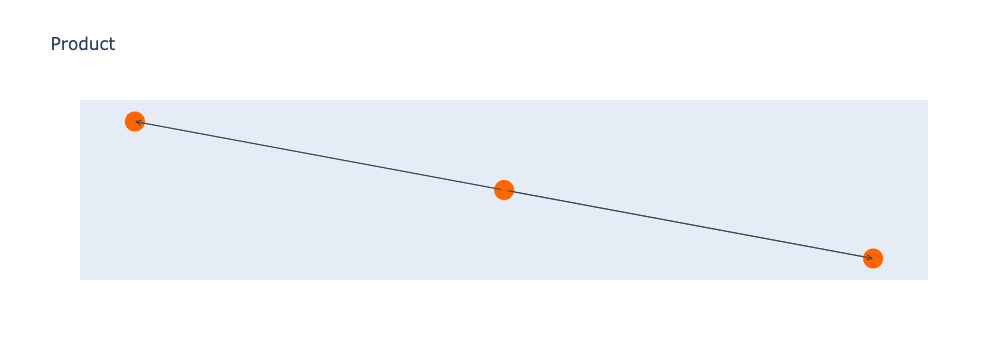

In [5]:
project.product.draw_plotly_network()

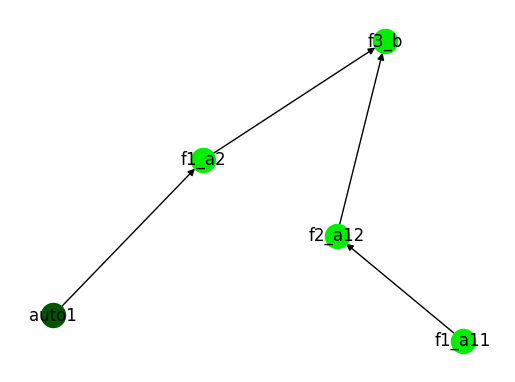

In [6]:
# Tasks including AutoTask in Workflow
task_f1_a11 = BaseTask('f1_a11', need_facility=True, default_work_amount=10)
task_f2_a12 = BaseTask('f2_a12', need_facility=True, default_work_amount=10)
task_f1_a2 = BaseTask('f1_a2', need_facility=True, default_work_amount=10)
task_f3_b = BaseTask('f3_b', need_facility=True, default_work_amount=10)
auto_task = BaseTask('auto1', auto_task=True)

task_f3_b.extend_input_task_list([task_f1_a2, task_f2_a12])
task_f2_a12.append_input_task(task_f1_a11)
task_f1_a2.append_input_task(auto_task)

# Register Workflow including Tasks in Project
project.workflow = BaseWorkflow([task_f1_a11, task_f2_a12, task_f1_a2, task_f3_b, auto_task])
project.workflow.draw_networkx()

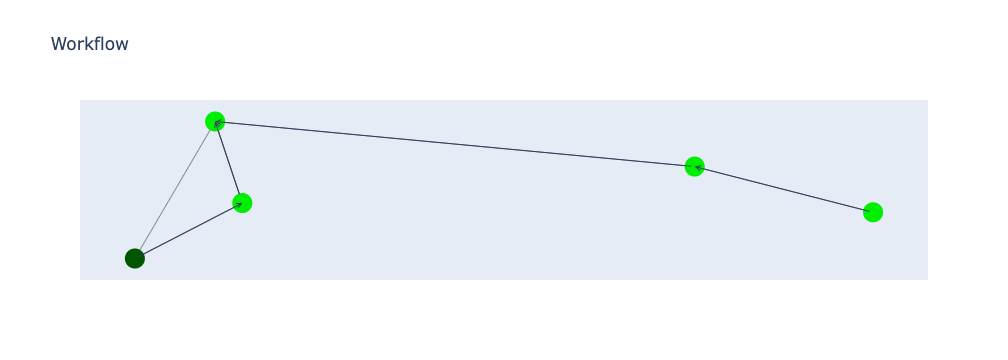

In [7]:
project.workflow.draw_plotly_network()

In [8]:
f1 = BaseWorkplace('f1', max_space_size=1.0)
f1_f1 = BaseFacility('f1_f1', cost_per_time=10)
f1_f1.workamount_skill_mean_map = {task_f1_a11.name:1.0, task_f1_a2.name:1.0}
f1.add_facility(f1_f1)

f2 = BaseWorkplace('f2',max_space_size=1.0)
f1_f2 = BaseFacility('f1_f2', cost_per_time=20)
f1_f2.workamount_skill_mean_map = {task_f2_a12.name:1.0}
f2.add_facility(f1_f2)

f3 = BaseWorkplace('f3',max_space_size=1.0)
f1_f3 = BaseFacility('f1_f3',workplace_id=f3.ID, cost_per_time=30)
f1_f3.workamount_skill_mean_map = {task_f3_b.name:1.0}
f3.add_facility(f1_f3)
f2_f3 = BaseFacility('f2_f3',workplace_id=f3.ID, cost_per_time=40)
f2_f3.workamount_skill_mean_map = {task_f3_b.name:1.0}
f3.add_facility(f2_f3)

factory_list = [f1, f2, f3]

In [9]:
team = BaseTeam('team')
w1 = BaseWorker('w1', cost_per_time=10.0)
w1.workamount_skill_mean_map = {task_f1_a11.name:1.0, task_f1_a2.name:1.0, task_f2_a12.name:1.0, task_f3_b.name:1.0,}
w1.facility_skill_map = {f1_f1.name:1.0, f1_f2.name:1.0, f1_f3.name:1.0, f2_f3.name:1.0} # NEW
team.add_worker(w1)
w2 = BaseWorker('w2', cost_per_time=10.0)
w2.workamount_skill_mean_map = {task_f1_a11.name:1.0, task_f1_a2.name:1.0, task_f2_a12.name:1.0, task_f3_b.name:1.0,}
w2.facility_skill_map = {f1_f1.name:1.0, f1_f2.name:1.0, f1_f3.name:1.0, f2_f3.name:1.0} #NEW
team.add_worker(w2)

team_list = [team]

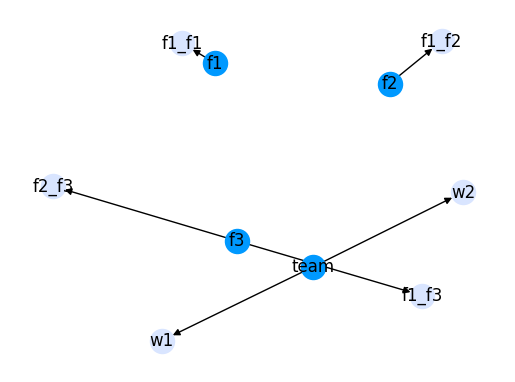

In [10]:
# Register Organization including Team in Project
project.organization = BaseOrganization(team_list, factory_list)
project.organization.draw_networkx(view_workers=True, view_facilities=True)

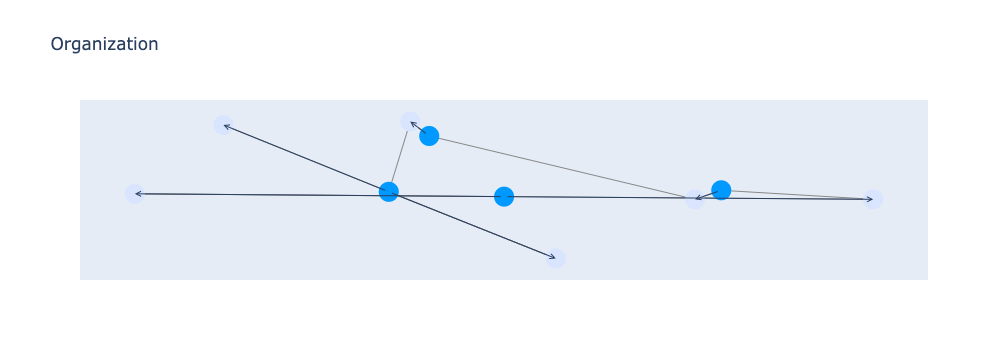

In [11]:
project.organization.draw_plotly_network(view_workers=True, view_facilities=True)

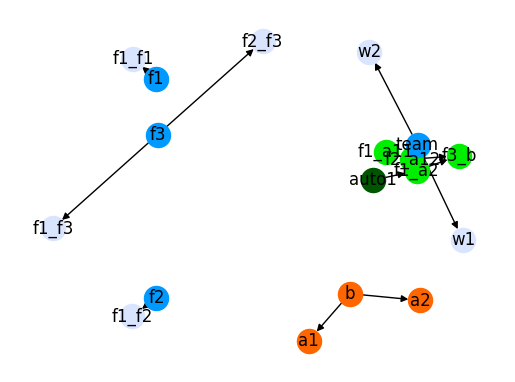

In [12]:
project.draw_networkx(view_workers=True, view_facilities=True)

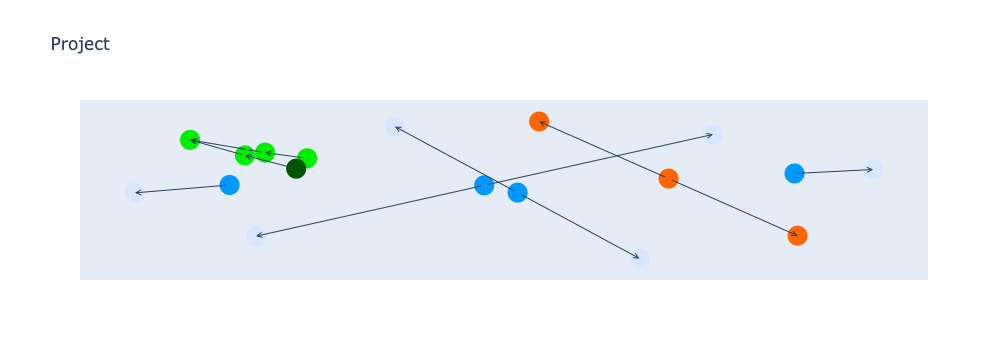

In [13]:
project.draw_plotly_network(view_workers=True, view_facilities=True)

In [14]:
# Component <-> Task
a1.extend_targeted_task_list([task_f1_a11,task_f2_a12])
a2.append_targeted_task(task_f1_a2)
b.append_targeted_task(task_f3_b)

# Team <-> Task
team.extend_targeted_task_list([task_f1_a11, task_f2_a12, task_f1_a2, task_f3_b])

# Factory <-> Task
f1.extend_targeted_task_list([task_f1_a11, task_f1_a2])
f2.extend_targeted_task_list([task_f2_a12])
f3.extend_targeted_task_list([task_f3_b])

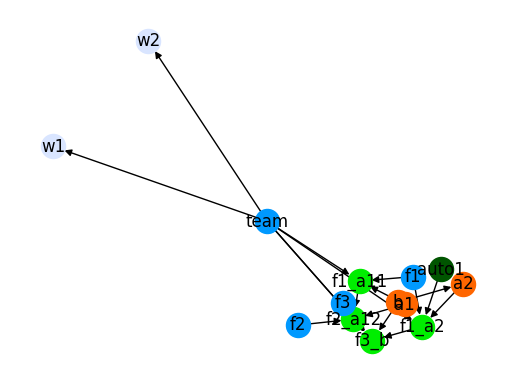

In [15]:
project.draw_networkx(view_workers=True)

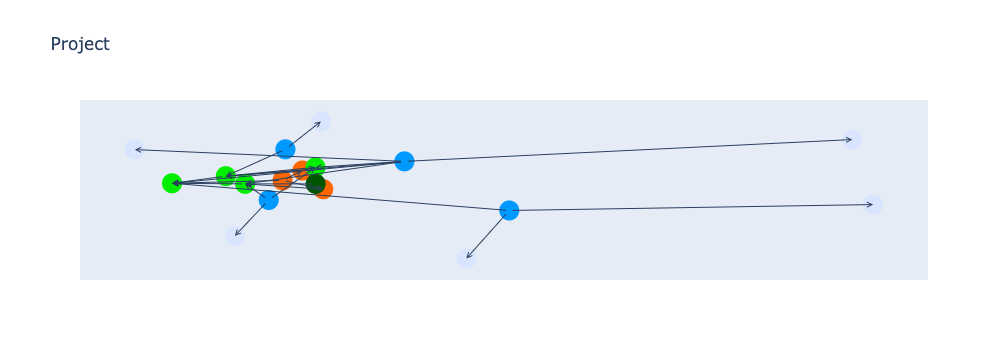

In [16]:
project.draw_plotly_network(view_workers=True,view_facilities=True)

## Simulation pattern 1-1

In [17]:
project.simulate(max_time = 100)

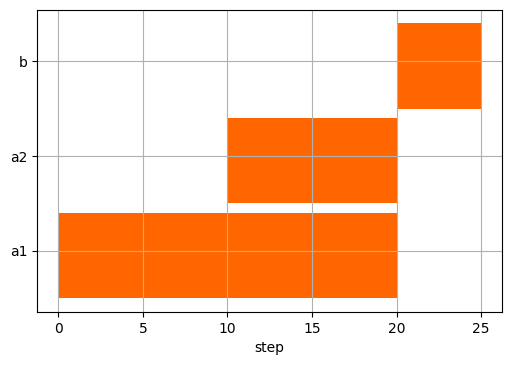

In [18]:
fig,ax=project.product.create_simple_gantt(view_ready=True)
fig

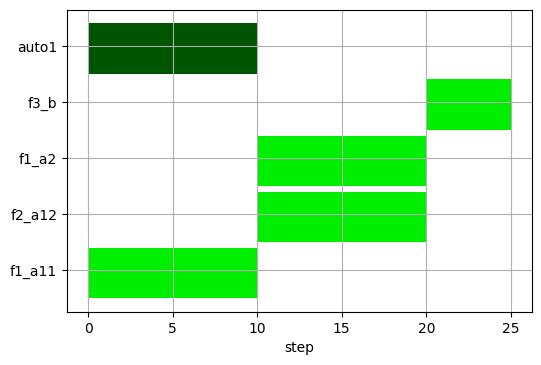

In [19]:
fig,ax=project.workflow.create_simple_gantt(view_auto_task=True, view_ready=True)
fig

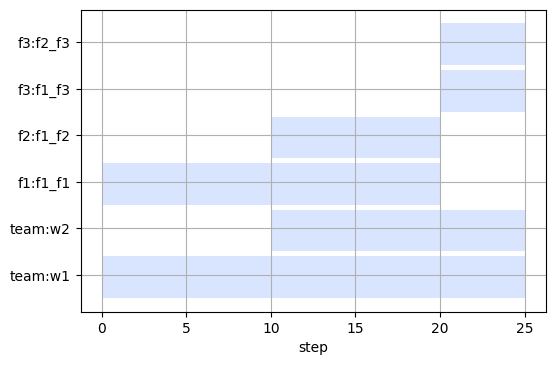

In [20]:
fig,ax=project.organization.create_simple_gantt()
fig

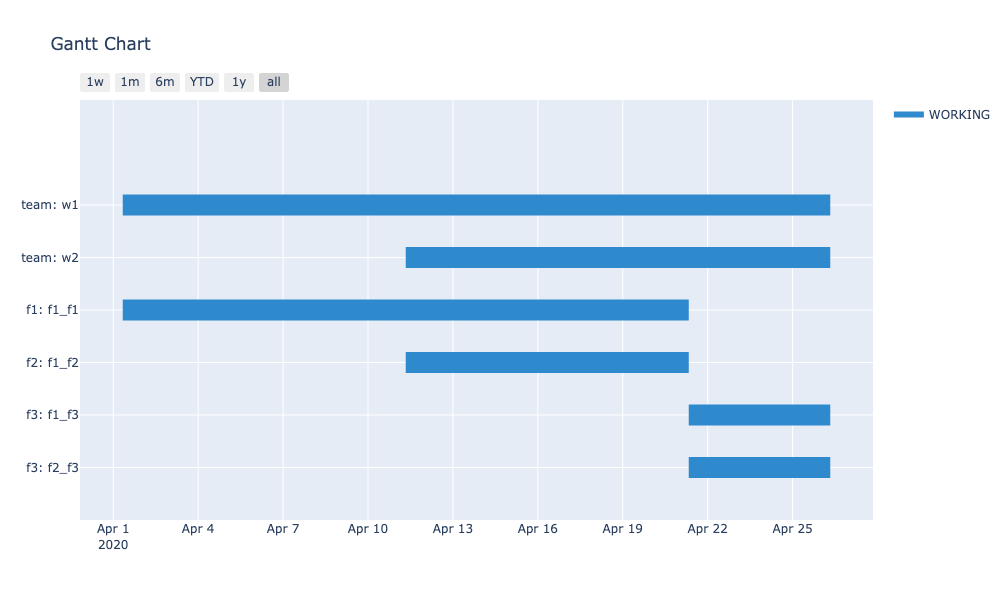

In [21]:
project.organization.create_gantt_plotly(project.init_datetime, project.unit_timedelta)

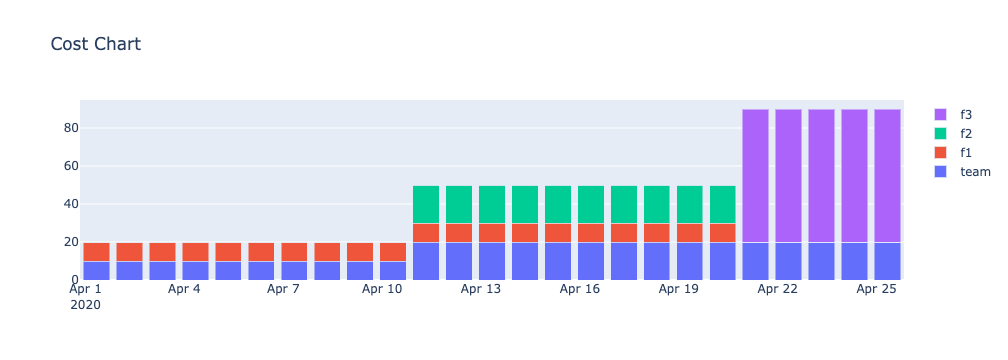

In [22]:
project.organization.create_cost_history_plotly(project.init_datetime, project.unit_timedelta)

### Simulation pattern 1-2
- ERROR has occured because they cannot work because of space problem 

In [23]:
task_f1_a11.append_input_task(auto_task)
task_f1_a11.append_input_task(task_f1_a2)
project.simulate(max_time = 100)

Exception: Time Over! Please check your simulation model or increase max_time value

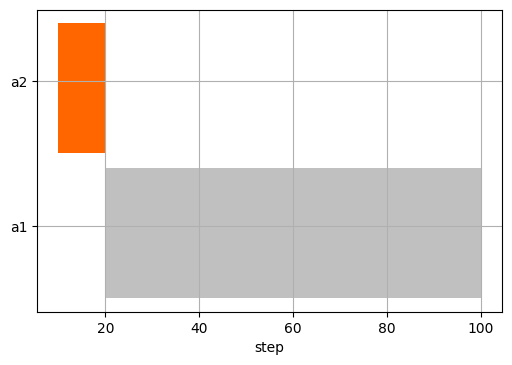

In [24]:
fig,ax=project.product.create_simple_gantt(view_ready=True)
fig

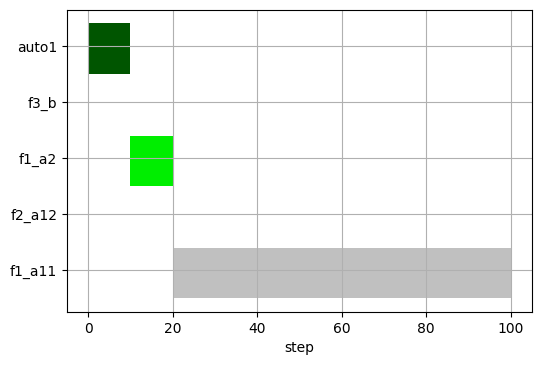

In [25]:
fig,ax=project.workflow.create_simple_gantt(view_auto_task=True, view_ready=True)
fig

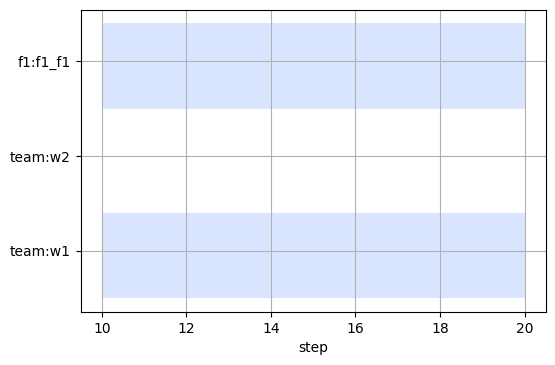

In [26]:
fig,ax=project.organization.create_simple_gantt()
fig

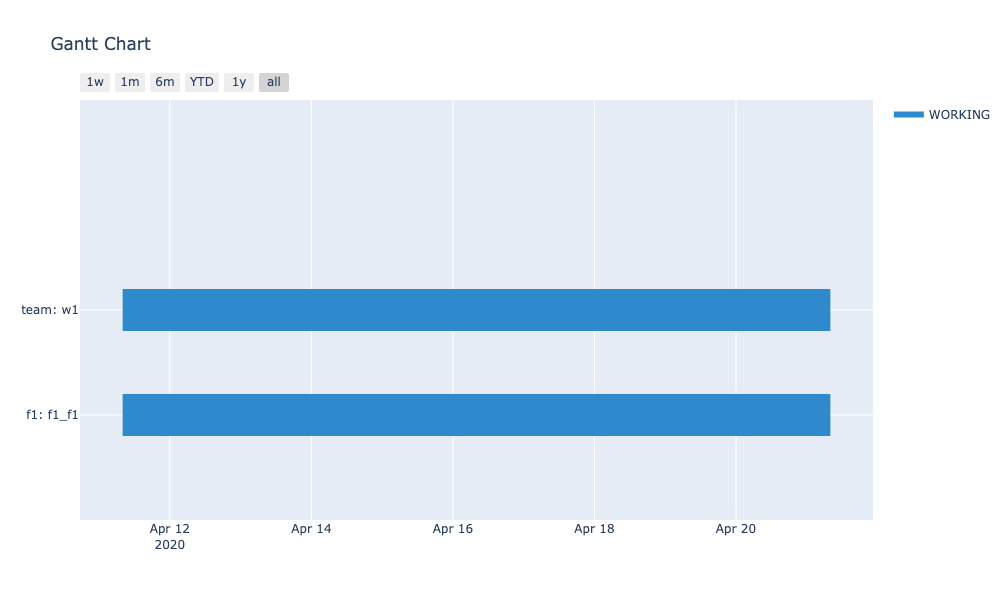

In [27]:
project.organization.create_gantt_plotly(project.init_datetime, project.unit_timedelta)

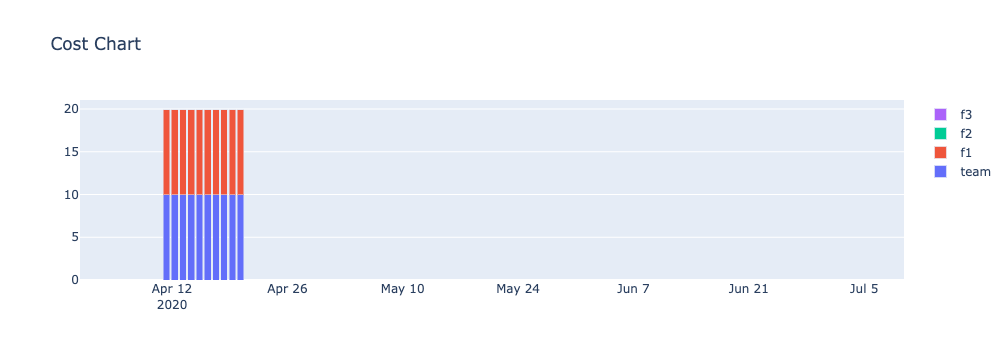

In [28]:
project.organization.create_cost_history_plotly(project.init_datetime, project.unit_timedelta)

## Simulation pattern 1-3

In [29]:
f1.max_space_size = 2.0
project.simulate(max_time = 100)

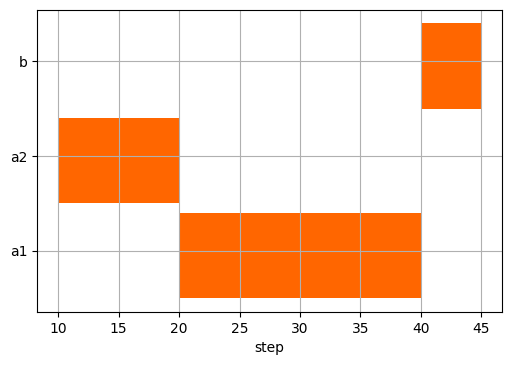

In [30]:
fig,ax=project.product.create_simple_gantt(view_ready=True)
fig

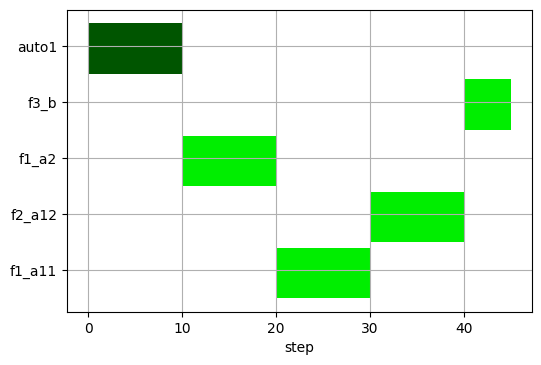

In [31]:
fig,ax=project.workflow.create_simple_gantt(view_auto_task=True, view_ready=True)
fig

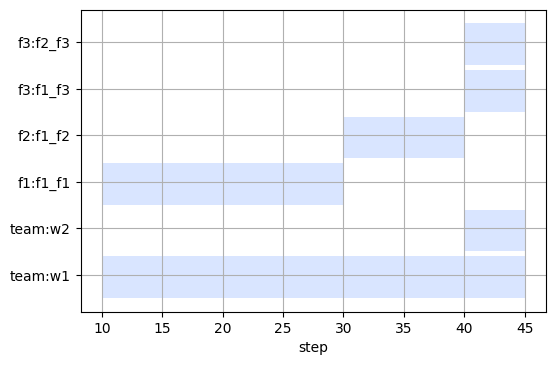

In [32]:
fig,ax=project.organization.create_simple_gantt()
fig

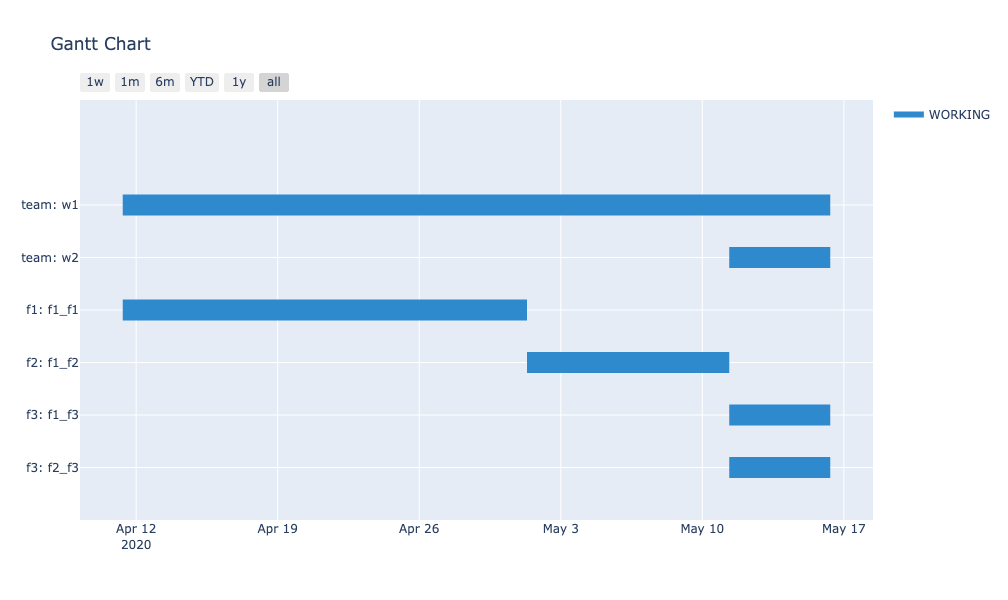

In [33]:
project.organization.create_gantt_plotly(project.init_datetime, project.unit_timedelta)

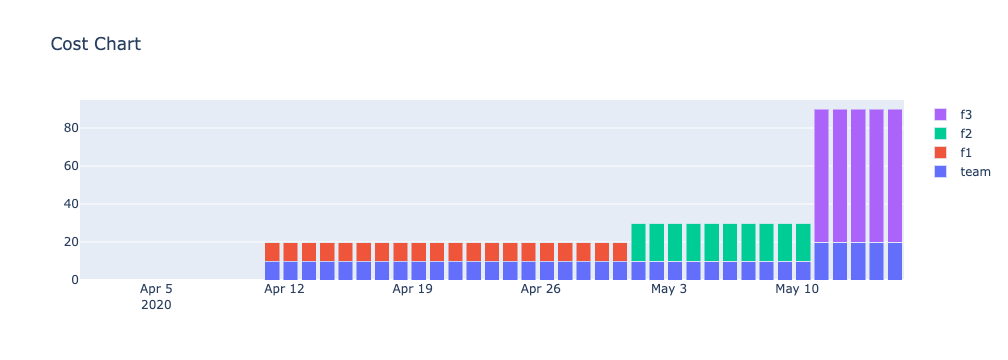

In [34]:
project.organization.create_cost_history_plotly(project.init_datetime, project.unit_timedelta)

## Simulation 1-4
- Fix allocation pattern in one case

In [35]:
task_f1_a11.fixing_allocating_worker_id_list = [w2.ID]
task_f3_b.fixing_allocating_facility_id_list = [f1_f3.ID]
project.simulate(max_time = 100)

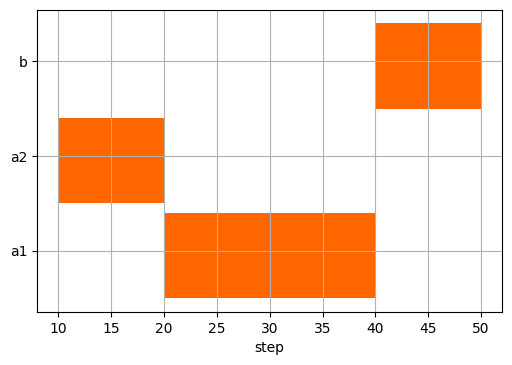

In [36]:
fig,ax=project.product.create_simple_gantt(view_ready=True)
fig

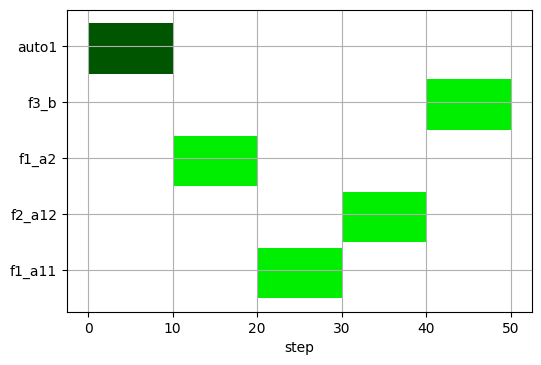

In [37]:
fig,ax=project.workflow.create_simple_gantt(view_auto_task=True, view_ready=True)
fig

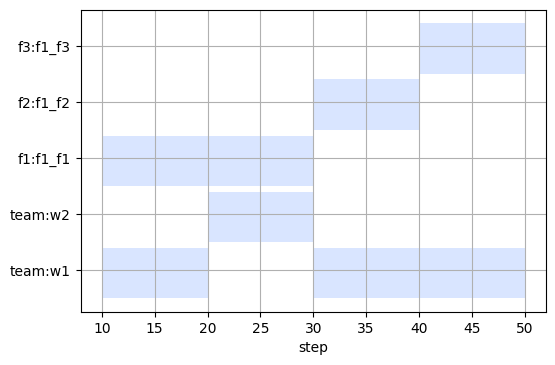

In [38]:
fig,ax=project.organization.create_simple_gantt()
fig

In [39]:
project.organization.create_gantt_plotly(project.init_datetime, project.unit_timedelta)

In [40]:
project.organization.create_cost_history_plotly(project.init_datetime, project.unit_timedelta)